In [1]:
from waveformkit import *
from matplotlib import pyplot as plt
import numpy as np

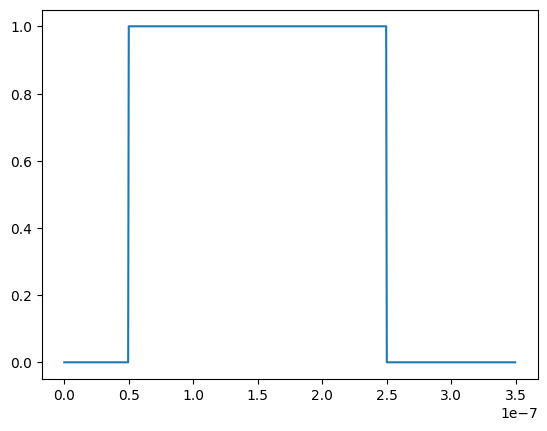

In [2]:
# make square wave
square_wave = pad_zero(
    waveform=np.ones(400),
    front_len=100, end_len=200
)
plt.plot(t_of(square_wave), square_wave)
plt.show()

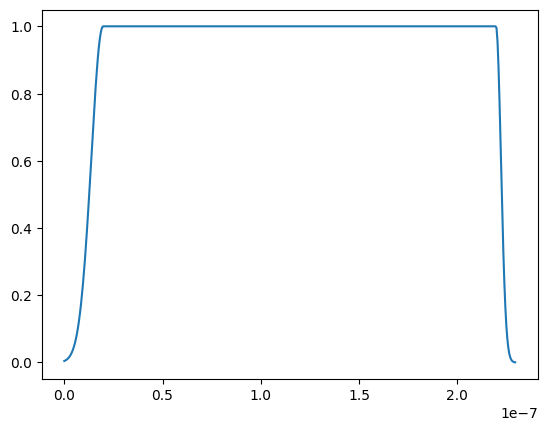

In [3]:
# make gassian padded square wave
gaus_padded_square = pad_gaussian(
    waveform=np.ones(400), 
    front_len=40, end_len=20,
    front_std_devi=12, end_std_devi=5
)
plt.plot(t_of(gaus_padded_square), gaus_padded_square)
plt.show()

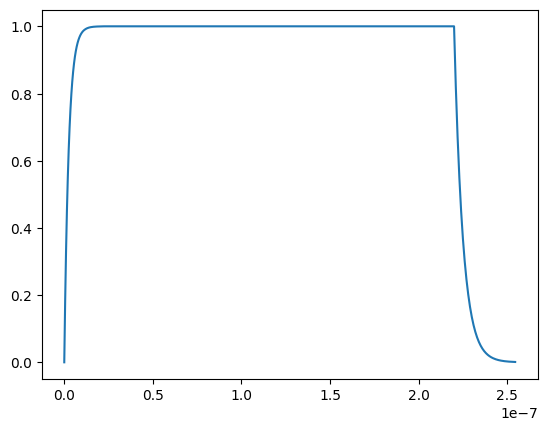

In [4]:
# make exp padded square wave
exp_padded_square = pad_exp(
    waveform=np.ones(400),
    front_len=40, end_len=70, front_tau=5, end_tau=10,
    front_concave_up=False, end_concave_up=True
)
plt.plot(t_of(exp_padded_square), exp_padded_square)
plt.show()

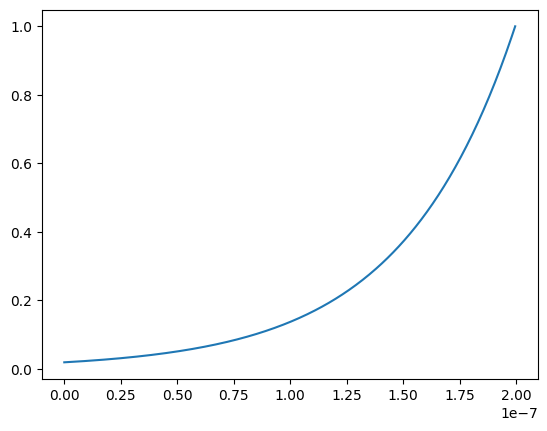

In [5]:
# make exp raising wave, for decay, replace `front` by `end`
# you can also make a gassain raising or decay similarly
exp_raising = pad_exp(
    waveform=[],
    front_len=400, front_tau=100,
    front_concave_up=True,
)
plt.plot(t_of(exp_raising), exp_raising)
plt.show()

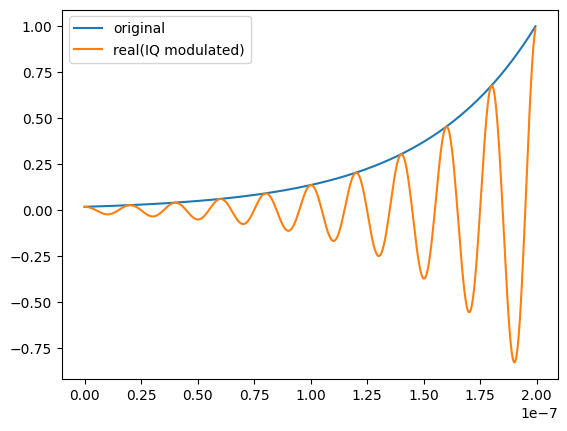

In [6]:
# IQ modulation
carrier_freq = 50e+6
iqmod_waveform = mix_by_an_digital_lo(
    exp_raising, lo_frequency=carrier_freq
)
plt.plot(t_of(exp_raising), exp_raising, label='original')
plt.plot(t_of(iqmod_waveform), np.real(iqmod_waveform), label='real(IQ modulated)')
plt.legend()
plt.show()

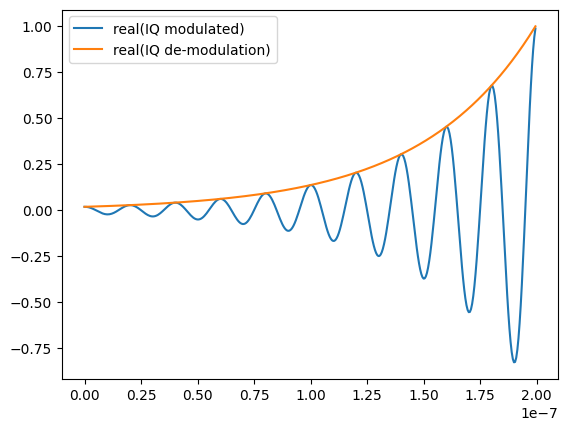

In [7]:
# IQ de-modulation
demod_freq = -carrier_freq
iqdemod_waveform = mix_by_an_digital_lo(
    iqmod_waveform, lo_frequency=demod_freq
)
plt.plot(t_of(iqmod_waveform), np.real(iqmod_waveform), label='real(IQ modulated)')
plt.plot(t_of(iqdemod_waveform), np.real(iqdemod_waveform), label='real(IQ de-modulation)')
plt.legend()
plt.show()